In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score

In [248]:
df = pd.read_csv(r"C:\PRGM\luminar\python_ml\DataSet\kc_house_data.csv")
pd.set_option("display.max_columns",False)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Understanding

In [249]:
df.drop(columns=["id","date"],inplace=True)
df.describe()
df.info()
df.isna().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)

df["floors"] = df["floors"].astype("int")
df["bathrooms"] = df["bathrooms"].astype("int")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

# Data Correlation

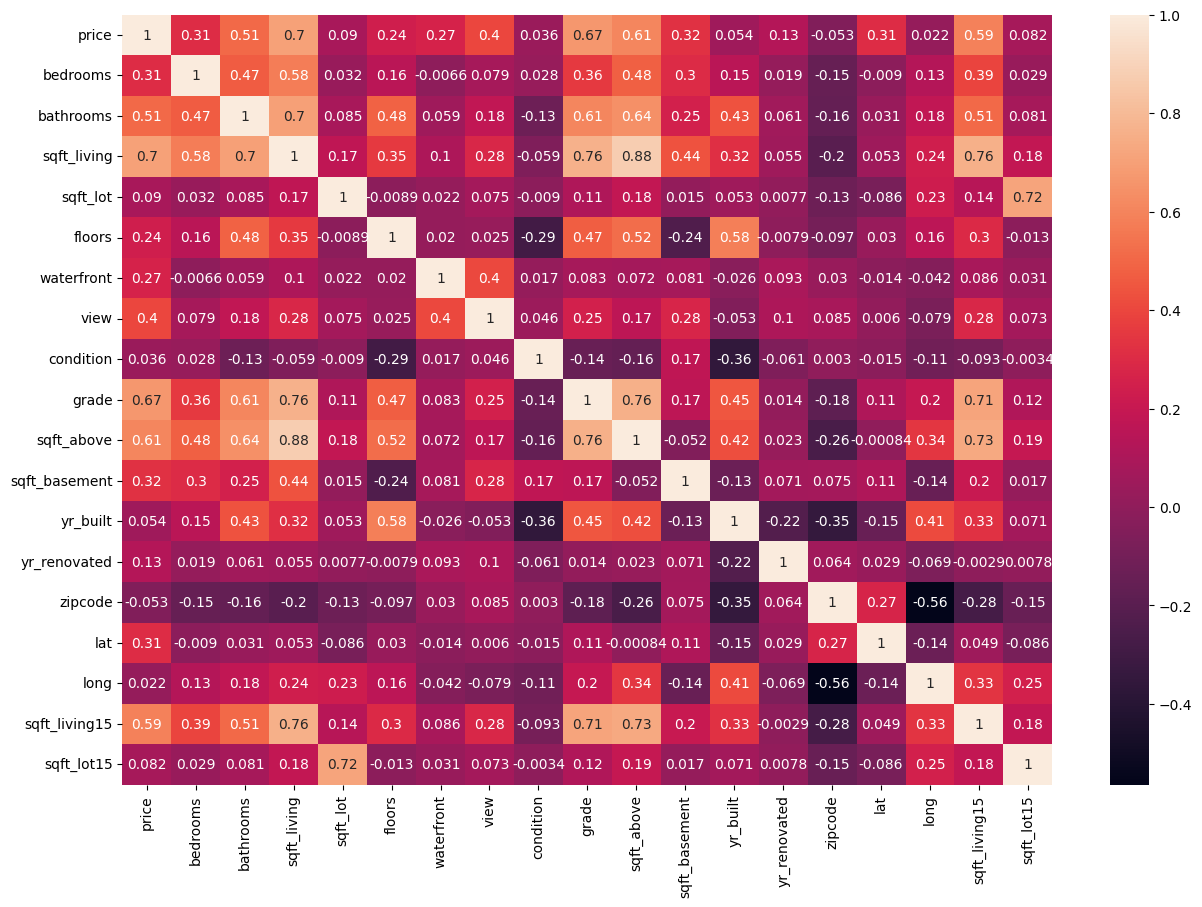

In [250]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

# Remove NonCorrelated Data

In [251]:
df_old = df.copy()
remove = ["sqft_lot","condition","sqft_above","sqft_basement","lat","long","sqft_living15","sqft_lot15"]
df.drop(columns=remove,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,yr_built,yr_renovated,zipcode
0,221900.0,3,1,1180,1,0,0,7,1955,0,98178
1,538000.0,3,2,2570,2,0,0,7,1951,1991,98125
2,180000.0,2,1,770,1,0,0,6,1933,0,98028
3,604000.0,4,3,1960,1,0,0,7,1965,0,98136
4,510000.0,3,2,1680,1,0,0,8,1987,0,98074


# Outlier Detection

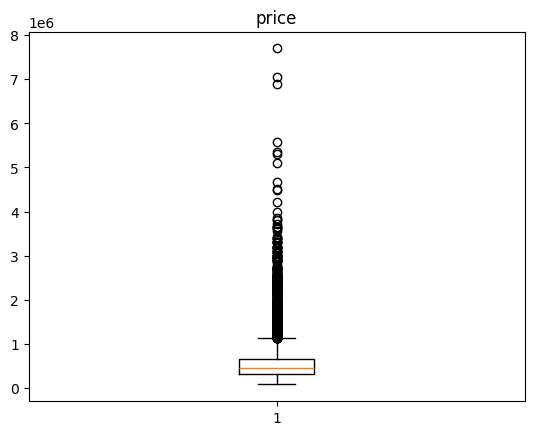

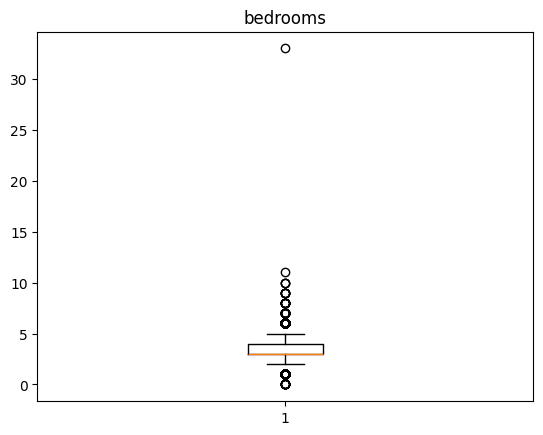

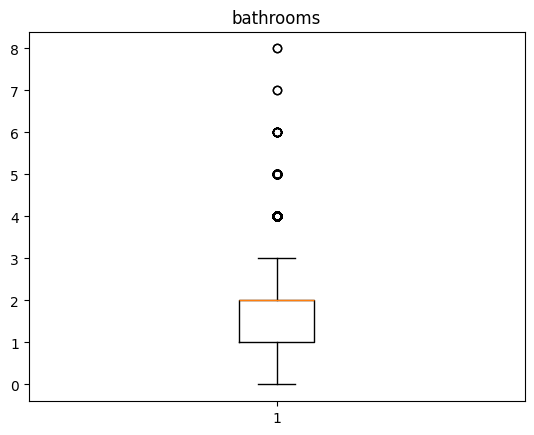

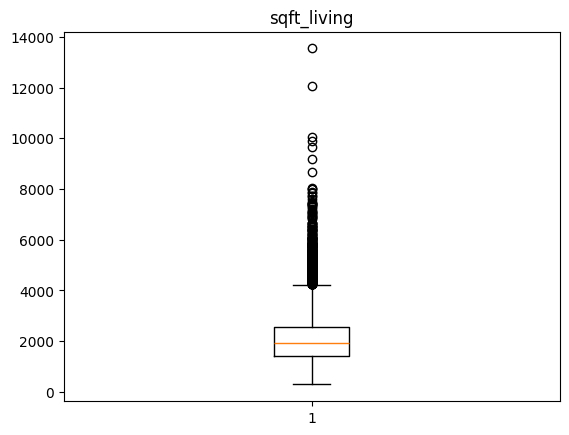

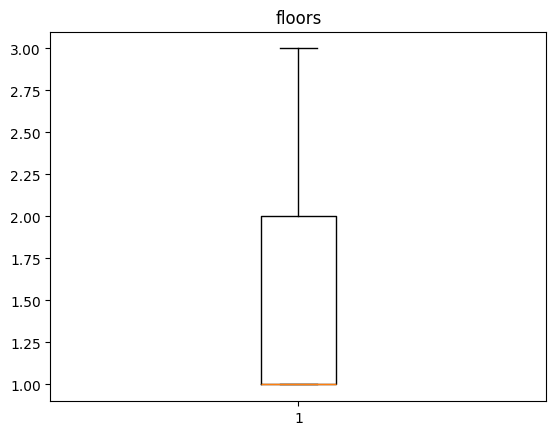

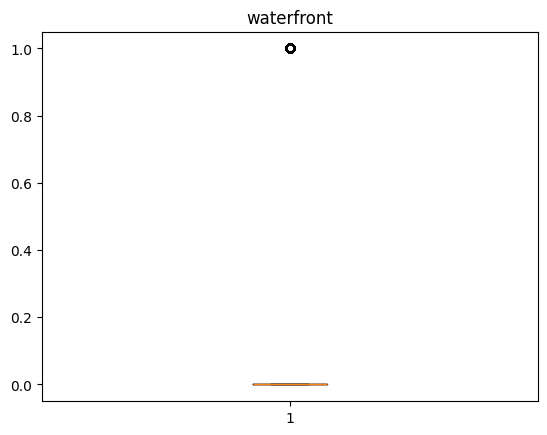

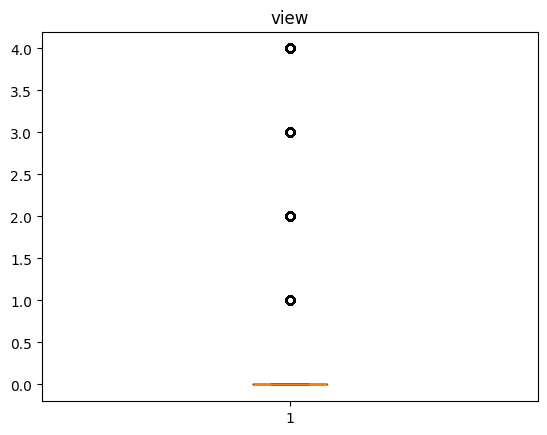

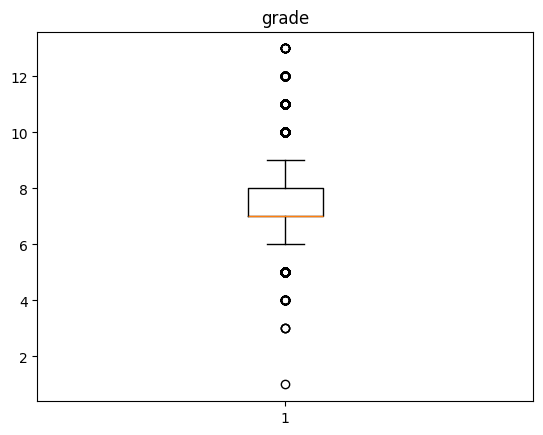

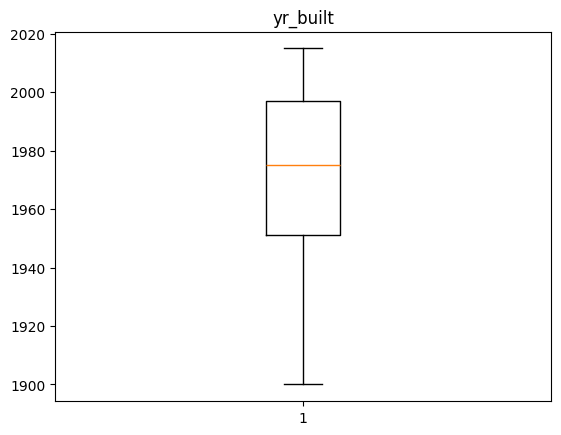

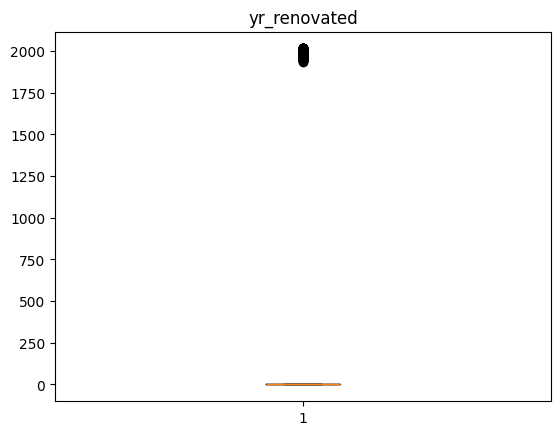

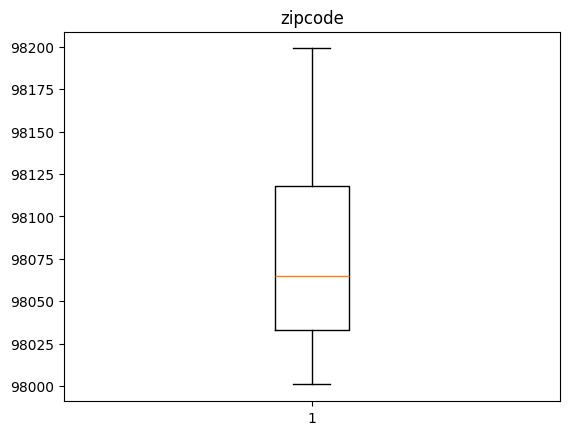

In [252]:
for i in df:
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()
  print()

# Outlier Removal

In [253]:
# df[df["price"]>4*10**6]
# df[df["bedrooms"]>8]
# df[df["bedrooms"]==0]
# df[df["bathrooms"]>7]
# df[df["bathrooms"]==0]
# df[df["sqft_living"]>8000]

In [254]:
df = df[df["price"]<4*10**6]
df = df[df["bedrooms"]<=8]
df = df[df["bathrooms"]<=7]
df = df[df["sqft_living"]<=8000]
df.shape

(21582, 11)

# Renovated or Not

In [255]:
def renovated(ren):
  if ren == 0:
    return 0
  else:
    return 1

df["yr_renovated"] = df["yr_renovated"].apply(func=renovated)
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,yr_built,yr_renovated,zipcode
0,221900.0,3,1,1180,1,0,0,7,1955,0,98178
1,538000.0,3,2,2570,2,0,0,7,1951,1,98125
2,180000.0,2,1,770,1,0,0,6,1933,0,98028
3,604000.0,4,3,1960,1,0,0,7,1965,0,98136
4,510000.0,3,2,1680,1,0,0,8,1987,0,98074


# ZipCode OneHotEncoding

In [256]:
ohe = OneHotEncoder(drop="first",sparse_output=False)
arr = ohe.fit_transform(df[["zipcode"]])
df_arr = pd.DataFrame(arr,columns=ohe.get_feature_names_out())
df_arr.head()

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Join OneHotColumns

In [257]:
df.drop(columns=["zipcode"],inplace=True)
df.reset_index(drop=True,inplace=True)
df = df.join(df_arr)
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,yr_built,yr_renovated,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1,1180,1,0,0,7,1955,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,538000.0,3,2,2570,2,0,0,7,1951,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,2,1,770,1,0,0,6,1933,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4,3,1960,1,0,0,7,1965,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3,2,1680,1,0,0,8,1987,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# X & Y columns

In [258]:
x = df.drop(columns=["price"])
y = df["price"]

# Train & Test Splitting

In [259]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=3)

# Linear Model Fitting

In [260]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

# Slope & Interception Values

In [261]:
m = lr.coef_
c = lr.intercept_

# Predict Values

In [262]:
y_pred = lr.predict(x_test)
y_pred

array([453045.59126178, 639109.73560481, 599876.1852414 , ...,
       584772.27204961, 363162.40511897, 262174.64643338])

# Check Regression Metrics

In [263]:
metrics = [mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score]
for i in metrics:
  print(i)
  print(i(y_test,y_pred))
  print()

<function mean_absolute_error at 0x0000023FD0992D40>
92447.89884236497

<function mean_absolute_percentage_error at 0x0000023FD0992FC0>
0.19526092293778927

<function mean_squared_error at 0x0000023FD0993100>
20308226698.192444

<function root_mean_squared_error at 0x0000023FD0993240>
142506.93561434982

<function r2_score at 0x0000023FD0993920>
0.8172161677024865



# User Interactable Model Function

In [273]:
x.head()
def House_Prediction():
  print("Welcome To House Price Predictor")
  print()

  while True:
    try:
      bedrooms = int(input("No. of Bedrooms: "))
    except ValueError:
      print("Invalid Data")
    else:
      print()
      break

  while True:
    try:
      bathrooms = int(input("No. of Bathrooms: "))
    except ValueError:
      print("Invalid Data")
    else:
      print()
      break

  while True:
    try:
      sqft = int(input("House Squarefeet: "))
      if sqft < 290 or sqft > 7880:
        print("Invalid Data")
      else:
        print()
        break
    except ValueError:
      print("Invalid Data")

  while True:
    try:
      floors = int(input("No. of Floors: "))
    except ValueError:
      print("Invalid Data")
    else:
      print()
      break

  while True:
    waterfront = input("WaterFront? (Yes or No): ")
    if waterfront.lower() == "yes":
      waterfront = 1
      print()
      break
    elif waterfront.lower() == "no":
      waterfront = 0
      print()
      break
    else:
      print("Invalid Data")

  while True:
    try:
      view = int(input("House View Rating (From 0 to 4): "))
      if view < 0 or view > 4:
        print("Invalid Data")
      else:
        print()
        break
    except ValueError:
      print("Invalid Data")

  while True:
    try:
      grade =  int(input("House Look Grade (From 1 to 13): "))
      if grade < 1 or grade > 13:
        print("Invalid Data")
      else:
        print()
        break
    except ValueError:
      print("Invalid Data")

  while True:
    try:
      year = int(input("Year Built (From 1900 to 2015): "))
      if year < 1900 or year > 2015:
        print("Invalid Data")
      else:
        print()
        break
    except ValueError:
      print("Invalid Data")

  while True:
    renovated = input("House Renovated? (Yes or No): ")
    if renovated.lower() == "yes":
      renovated = 1
      print()
      break
    elif renovated.lower() == "no":
      renovated = 0
      print()
      break
    else:
      print("Invalid Data")

  while True:
    try:
      print(f"ZipCode (Amoung {df_old['zipcode'].unique()})")
      zipcode = int(input("ZipCode: "))
      if zipcode not in df_old["zipcode"].unique():
        print("Invalid Data")
      else:
        print()
        break
    except ValueError:
      print("Invalid Data")

  inp = np.array([[bedrooms,bathrooms,sqft,floors,waterfront,view,grade,year,renovated]])
  zip = ohe.transform([[zipcode]])

  arr = np.hstack([inp,zip])

  print("House Price: ",round(lr.predict(arr)[0]))
  print()

Checking Values

In [272]:
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront','view', 'grade', 'yr_built', 'yr_renovated']

for i in cols:
    print(i)
    print(f"MIN:{df[i].min()} & MAX:{df[i].max()}")
    print()

price
MIN:75000.0 & MAX:3850000.0

bedrooms
MIN:0 & MAX:8

bathrooms
MIN:0 & MAX:6

sqft_living
MIN:290 & MAX:7880

floors
MIN:1 & MAX:3

waterfront
MIN:0 & MAX:1

view
MIN:0 & MAX:4

grade
MIN:1 & MAX:13

yr_built
MIN:1900 & MAX:2015

yr_renovated
MIN:0 & MAX:1



# Pickle

In [266]:
dit = {"Model":lr, "OneHot":ohe, "Zip":df_old["zipcode"].unique()}

with open("house_price_predictor.pkl","wb") as f:
    pickle.dump(dit,f)